<a href="https://colab.research.google.com/github/Jessicaus/Sentiment-Analysis-of-Articles-in-reuters.com/blob/main/Sentiment%20Analysis%20of%20Articles%20in%20reuters.com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")
  plt.figure()

In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
def articles(content,titles,descriptions,timestamp):
  for i in range(len(content)):
    titles.append(content[i].find(class_='story-title').get_text().strip())
    descriptions.append(content[i].find('p').get_text().strip())
    timestamp.append(content[i].find(class_="timestamp").get_text().strip())

In [37]:
titles=[]
descriptions=[]
timestamp=[]
for i in range(1,401):
  url="https://www.reuters.com/news/archive/worldnews?view=page&page="+str(i)+"&pageSize=10"
  response=requests.get(url)
  page=response.text 
  soup=BeautifulSoup(page,'html.parser')

  content=soup.find_all(class_='story ')
  articles(content,titles,descriptions,timestamp)

In [38]:
sentimentval=[]
for i in range(len(descriptions)):
  #visualise_sentiments({
      #"Sentence":["SENTENCE"] + s.split(),
      #"Sentiment":[sid.polarity_scores(s)["compound"]] + [sid.polarity_scores(word)["compound"] for word in s.split()]
  #})
  sentimentval.append(sid.polarity_scores(descriptions[i])["compound"])

In [39]:
df=pd.DataFrame(list(zip(titles,descriptions,timestamp,sentimentval)),columns=["Title","Description","Time","Sentiment Value"])
df

,Title,Description,Time,Sentiment Value
0,Police blitz targets parties driving Brazil's ...,Police broke up an illegal party with nearly 6...,8:17pm EST,-0.5719
1,Londoners protest after police officer charged...,Police in London clashed with mourners and pro...,7:53pm EST,-0.9393
2,British Airways calls for vaccinated people to...,British Airways's new boss said vaccinated peo...,7:18pm EST,-0.4378
3,German regional elections present crunch test ...,German voters go to the polls on Sunday in reg...,7:04pm EST,0.2960
4,"Sri Lanka to ban burqa, shut many Islamic scho...",Sri Lanka will ban the wearing of the burqa an...,6:26pm EST,-0.5574
...,...,...,...,...
3995,"Philippines, China vow cooperation for post-pa...","China promised on Saturday to donate 500,000 C...",Jan 16 2021,0.5994
3996,Aftershock shakes Indonesia quake zone as resc...,An aftershock jolted Indonesia's Sulawesi isla...,Jan 16 2021,-0.7650
3997,Ally of poisoned Kremlin critic Navalny jailed...,"Pavel Zelensky, a member of the Anti-Corruptio...",Jan 16 2021,-0.7506
3998,Portuguese hospitals under pressure as COVID-1...,Portugal's fragile health system is under grow...,Jan 16 2021,-0.7906


In [40]:
cntpos=0
cntneg=0
cntneu=0
for val in df["Sentiment Value"]:
  if (val>0):
    cntpos+=1
  elif (val<0):
    cntneg+=1
  else:
    cntneu+=1
print(cntpos)
print(cntneg)
print(cntneu)

1509
2031
460


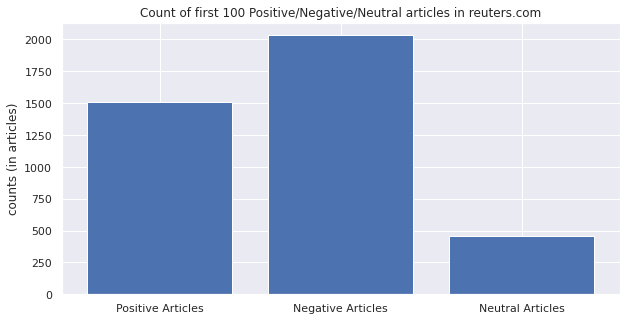

In [76]:
plt.figure(figsize=(10,5))
lstname=["Positive Articles","Negative Articles","Neutral Articles"]
lstcnt=[cntpos,cntneg,cntneu]
plt.bar(lstname,lstcnt)
plt.title("Count of first 100 Positive/Negative/Neutral articles in reuters.com")
plt.ylabel("counts (in articles)")
plt.show()

In [49]:
s="Jan 17 2021"
s=datetime.datetime.strptime(s,"%b %d %Y")
s1="Jan 16 2021"
s1=datetime.datetime.strptime(s1,"%b %d %Y")
print(s<=s1)
print(df["Time"][0])

False
8:17pm EST


In [55]:
weeksAveragecompound=[]
s="Mar 13 2021"
averageval=0;cntarticles=0;cntdays=1;lastday=datetime.datetime.strptime(s,"%b %d %Y");today=lastday
for i in range(len(df)):
  time=df["Time"][i]
  if ("EST" not in time):
    today=datetime.datetime.strptime(df["Time"][i],"%b %d %Y")
  if (lastday!=today):
    cntdays+=1
    lastday=today
  averageval+=df["Sentiment Value"][i]
  cntarticles+=1
  if cntdays==7:
    averageval/=cntarticles
    weeksAveragecompound.append(averageval)
    averageval=0;cntdays=0;cntarticles=0
weeksAveragecompound

[-0.13405040816326533,
 -0.11529028268551235,
 -0.08618970297029704,
 -0.09520886319845859,
 -0.12178473451327439,
 -0.1159037199124726,
 -0.10589271948608134,
 -0.08638790983606562]

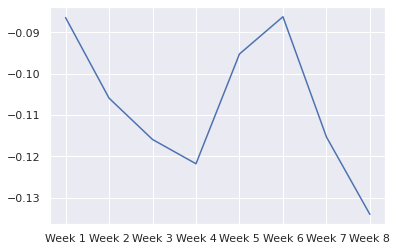

In [62]:
weeksAveragecompound.reverse()
lstWeek=[]
for i in range(len(weeksAveragecompound)):
  lstWeek.append("Week "+str(i+1))
plt.figure(figsize=(6,4))
plt.plot(lstWeek,weeksAveragecompound)

In [64]:
stop_words=set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

In [65]:
def word_process(word):
  w=word
  w=word.lower().rstrip(punctuation).lstrip(punctuation)
  if "'" in w:
    w=w[:w.index("'")]
  return w

In [66]:
dctall={}
for i in range(len(df)):
  s=df['Title'][i]
  l=s.split()
  for j in range(len(l)):
    l[j]=word_process(l[j])
    if l[j] in stop_words or l[j]=="":
      continue

    if l[j] in dctall:
      dctall[l[j]]+=1
    else:
      dctall[l[j]]=1

dctall=dict(sorted(dctall.items(),key=lambda item:item[1],reverse=True))
print(len(dctall))
print(dctall)

6834
{'says': 629, 'u.s': 463, 'covid-19': 370, 'myanmar': 332, 'vaccine': 266, 'new': 244, 'china': 235, 'uk': 199, 'biden': 182, 'eu': 180, 'u.n': 146, 'iran': 142, 'covid': 139, 'pm': 138, 'navalny': 137, 'police': 133, 'minister': 133, 'russia': 117, 'court': 112, 'coronavirus': 108, 'state': 104, 'president': 103, 'protests': 99, 'india': 99, 'first': 99, 'calls': 96, 'government': 96, 'south': 96, 'sanctions': 93, 'lockdown': 89, 'australia': 85, 'kremlin': 85, 'hong': 84, 'britain': 84, 'cases': 83, 'italy': 83, 'rights': 83, 'coup': 82, 'mexico': 82, 'protest': 81, 'kong': 81, 'military': 81, 'korea': 79, 'deal': 73, 'saudi': 72, 'japan': 71, 'say': 71, 'talks': 71, 'amid': 69, 'germany': 68, 'israel': 68, 'leader': 66, 'chief': 65, 'two': 64, 'opposition': 63, 'france': 63, 'house': 61, 'pandemic': 61, 'brazil': 60, 'foreign': 60, 'astrazeneca': 60, 'party': 59, 'nuclear': 59, 'russian': 58, 'yemen': 58, 'security': 57, 'protesters': 57, 'killed': 56, 'media': 55, 'vaccines': 

In [67]:
# Stop Words Ex. a, the
#print(len(df))
#Wrong: print(df[0]['Title'])
#df.iloc[0][0]
#df['Title'][0]

lst=[]
for i in range(len(df)):
  s=df['Title'][i]
  l=s.split()
  for j in range(len(l)):
    l[j]=l[j].lower()
    #Remove start/trailing punctuation
    l[j]=l[j].lstrip(punctuation)
    l[j]=l[j].rstrip(punctuation)
    #Remove 's
    if "'" in l[j]:
      l[j]=l[j][:l[j].index("'")]

    if l[j] not in stop_words:
      lst.append(l[j])
print(lst)
print(len(lst))

['police', 'blitz', 'targets', 'parties', 'driving', 'brazil', 'deadly', 'covid-19', 'surge', 'londoners', 'protest', 'police', 'officer', 'charged', 'woman', 'murder', 'british', 'airways', 'calls', 'vaccinated', 'people', 'travel', 'without', 'restrictions', 'german', 'regional', 'elections', 'present', 'crunch', 'test', 'merkel', 'party', 'sri', 'lanka', 'ban', 'burqa', 'shut', 'many', 'islamic', 'schools', 'minister', 'says', 'exclusive', 'north', 'korea', 'unresponsive', 'behind-the-scenes', 'biden', 'administration', 'outreach', '', 'u.s', 'official', 'least', '12', 'killed', 'protests', 'myanmar', 'civilian', 'vice-president', 'vows', 'resistance', 'junta', 'bolivia', 'ex-president', 'anez', 'behind', 'bars', 'alleges', 'political', 'persecution', 'coup', 'claims', 'editor', 'germany', 'bild', 'steps', 'aside', 'bullying', 'probe', 'vice-president', 'myanmar', 'civilian', 'government', 'vows', 'resistance', 'junta', 'rule', 'west', 'australia', 'centre-left', 'party', 're-electe

In [68]:
dct={}
for i in range(len(lst)):
  if lst[i] in dct:
    dct[lst[i]]+=1
  else:
    dct[lst[i]]=1
print(dct)
print(len(dct))

{'police': 133, 'blitz': 2, 'targets': 7, 'parties': 9, 'driving': 2, 'brazil': 60, 'deadly': 11, 'covid-19': 370, 'surge': 25, 'londoners': 1, 'protest': 81, 'officer': 8, 'charged': 14, 'woman': 23, 'murder': 15, 'british': 25, 'airways': 1, 'calls': 96, 'vaccinated': 8, 'people': 44, 'travel': 39, 'without': 10, 'restrictions': 33, 'german': 45, 'regional': 10, 'elections': 14, 'present': 1, 'crunch': 2, 'test': 15, 'merkel': 15, 'party': 59, 'sri': 3, 'lanka': 2, 'ban': 38, 'burqa': 3, 'shut': 9, 'many': 8, 'islamic': 13, 'schools': 11, 'minister': 133, 'says': 629, 'exclusive': 52, 'north': 43, 'korea': 79, 'unresponsive': 1, 'behind-the-scenes': 1, 'biden': 182, 'administration': 25, 'outreach': 1, '': 91, 'u.s': 463, 'official': 45, 'least': 30, '12': 8, 'killed': 56, 'protests': 99, 'myanmar': 332, 'civilian': 2, 'vice-president': 3, 'vows': 16, 'resistance': 4, 'junta': 29, 'bolivia': 1, 'ex-president': 3, 'anez': 1, 'behind': 13, 'bars': 4, 'alleges': 5, 'political': 29, 'per

In [69]:
sortlist=sorted(dct.items(),key=lambda item:item[1],reverse=True)

In [70]:
sortlisth=sortlist[0:10]
sortlisth

[('says', 629),
 ('u.s', 463),
 ('covid-19', 370),
 ('myanmar', 332),
 ('vaccine', 266),
 ('new', 244),
 ('china', 235),
 ('uk', 199),
 ('biden', 182),
 ('eu', 180)]

In [71]:
# print(type(sortlisth[0]))
# print(sortlisth[0][1]) prints out 12
top10words=[t[0] for t in sortlisth]
top10cnt=[t[1] for t in sortlisth]

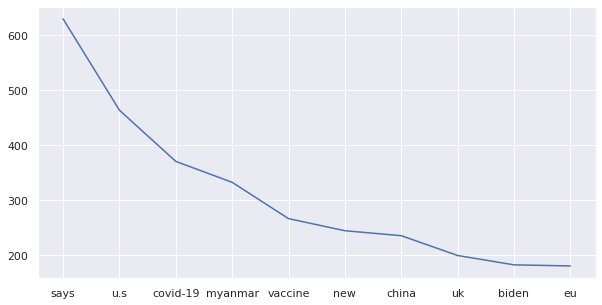

In [75]:
fig=plt.figure(figsize=(10,5))
ax=plt.axes()
ax.plot(top10words,top10cnt)

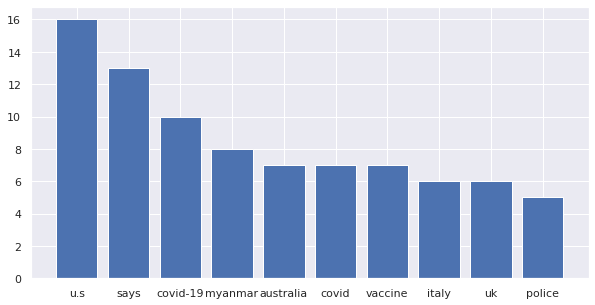

In [15]:
plt.figure(figsize=(10,5))
plt.bar(top10words,top10cnt)
plt.show()

In [16]:
top10art=descriptions[0:10]
for art in top10art:
  print(sid.polarity_scores(art)["compound"])

-0.9393
-0.4378
0.296
-0.5574
0.5994
-0.4767
-0.4767
-0.5267
-0.296
0.802
